In [1]:
import nltk
# Run this the first time you use NLTK
# nltk.download()

In [2]:
from nltk.tokenize import sent_tokenize, word_tokenize

EXAMPLE_TEXT = "Hello Mr. Smith, how are you doing today? The weather is great, and Python is awesome. The sky is pinkish-blue. You shouldn't eat cardboard."

print(sent_tokenize(EXAMPLE_TEXT))
print(word_tokenize(EXAMPLE_TEXT))

['Hello Mr. Smith, how are you doing today?', 'The weather is great, and Python is awesome.', 'The sky is pinkish-blue.', "You shouldn't eat cardboard."]
['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'Python', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard', '.']


## Stop words
Stopwords should be removed from the list of words.

In [3]:
from nltk.corpus import stopwords

In [4]:
stop_words = set(stopwords.words('english'))

In [5]:
word_tokens = word_tokenize(EXAMPLE_TEXT)
filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
print(word_tokens)
print(filtered_sentence)

['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'Python', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard', '.']
['Hello', 'Mr.', 'Smith', ',', 'today', '?', 'weather', 'great', ',', 'Python', 'awesome', '.', 'sky', 'pinkish-blue', '.', "n't", 'eat', 'cardboard', '.']


## Example one - Bob Dylan - Hurricane's lyrics
Lets analyse the lyrics from Bob Dylan's Hurricane. First we get the lyrics from his website:

In [6]:
import lxml.html
import requests
response = requests.get('https://bobdylan.com/songs/hurricane/')
etree = lxml.html.fromstring(response.text)
lyrics = etree.cssselect('div[class*=\'lyrics\']')[0].text_content()

Tokenize the lyrics based on words:

In [7]:
word_tokens = word_tokenize(lyrics)

Remove the stopwords from the words:

In [8]:
filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]

### Create a word frequency graph

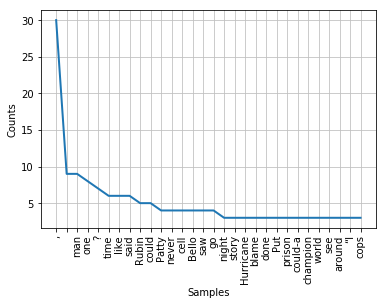

In [9]:
from nltk import FreqDist
fd = FreqDist(filtered_sentence)
fd.plot(30,cumulative=False)

What we see in the graph above is that punctuation is disturbing the graph. We use a regular expression now to remove these characters and only select words.

In [10]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
word_tokens = tokenizer.tokenize(lyrics)
filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]

Lets create the graph again:

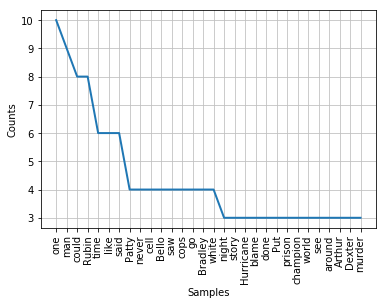

In [11]:
fd = FreqDist(filtered_sentence)
fd.plot(30,cumulative=False)

## Example two - Wikipedia about Nintendo

In [12]:
import wikipedia
nintendo = wikipedia.page("Nintendo")
word_tokens = word_tokenize(nintendo.content)

In [13]:
filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]

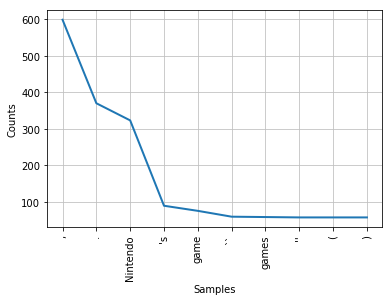

In [14]:
fd = FreqDist(filtered_sentence)
fd.plot(10,cumulative=False)

In [15]:
tokenizer = RegexpTokenizer(r'\w+')
word_tokens = tokenizer.tokenize(nintendo.content)

In [16]:
filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]

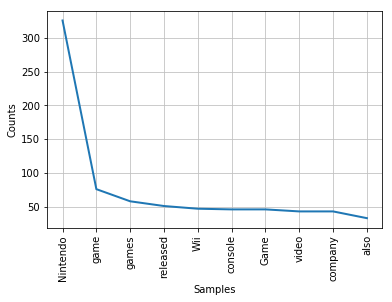

In [17]:
fd = FreqDist(filtered_sentence)
fd.plot(10,cumulative=False)